In [1]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split


In [2]:
#Load all 5 Datasets

df = pd.read_csv('data.csv')

df_artist = pd.read_csv('data_by_artist.csv')

df_by_genres = pd.read_csv('data_by_genres.csv')

df_year = pd.read_csv('data_by_year.csv')

df_w_genres = pd.read_csv('data_w_genres.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [5]:
df_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [6]:
df_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [7]:
df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


# DATA ANALYSIS

In [8]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# DATA CLEANING 

In [10]:
#Convert Milli secs duration into minutes
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df_by_genres['duration_min'] = df_by_genres['duration_ms']/60000
df_by_genres['duration_min'] = df_by_genres['duration_min'].round(2)

df['duration_min'].head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [11]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [12]:
#Add Song decade column in the dataset
df['Song Decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song Decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song Decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song Decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song Decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song Decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song Decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song Decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song Decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song Decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song Decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song Decade'] = '2020s'

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78,1920s


In [13]:
#Remove unnecessary Braces from the genres column

df_w_genres['genres'] = df_w_genres['genres'].str.replace("'","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("[","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("]","")

df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [14]:
df.duplicated().any().sum()

0

In [15]:
df[(df['artists'] == "Billie Holiday") & (df['name']== "No Regrets - Take 1")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
2293,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s
2298,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s


In [16]:
df = df.drop(labels=['id', 'release_date'], axis=1)
df.shape

(170653, 19)

In [17]:
df.duplicated().sum()

565

In [18]:
df = df[~df.duplicated()==1]
df.shape


(170088, 19)

In [19]:
df.duplicated().sum()

0

In [22]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.78,1920s


In [21]:
df.duration_min.sum()/(24*365*60)

1.245739897260274

In [23]:
#Drop the columns
df.drop(['duration_ms'],inplace=True,axis=1)

In [24]:
plt.rcParams.update({'font.size': 22})

<AxesSubplot:xlabel='mode', ylabel='Density'>

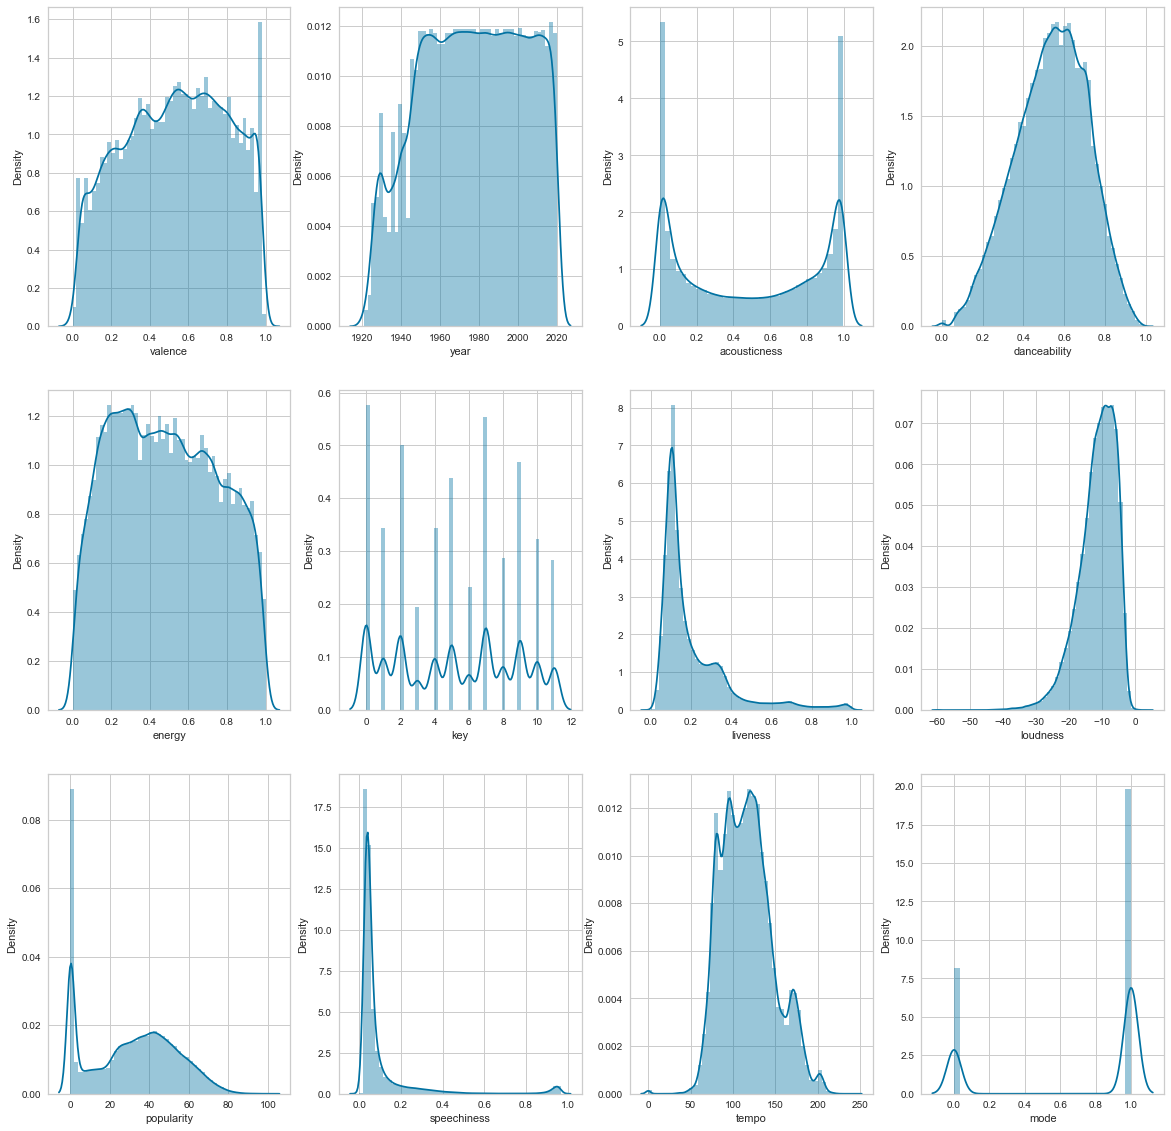

In [25]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

<AxesSubplot:>

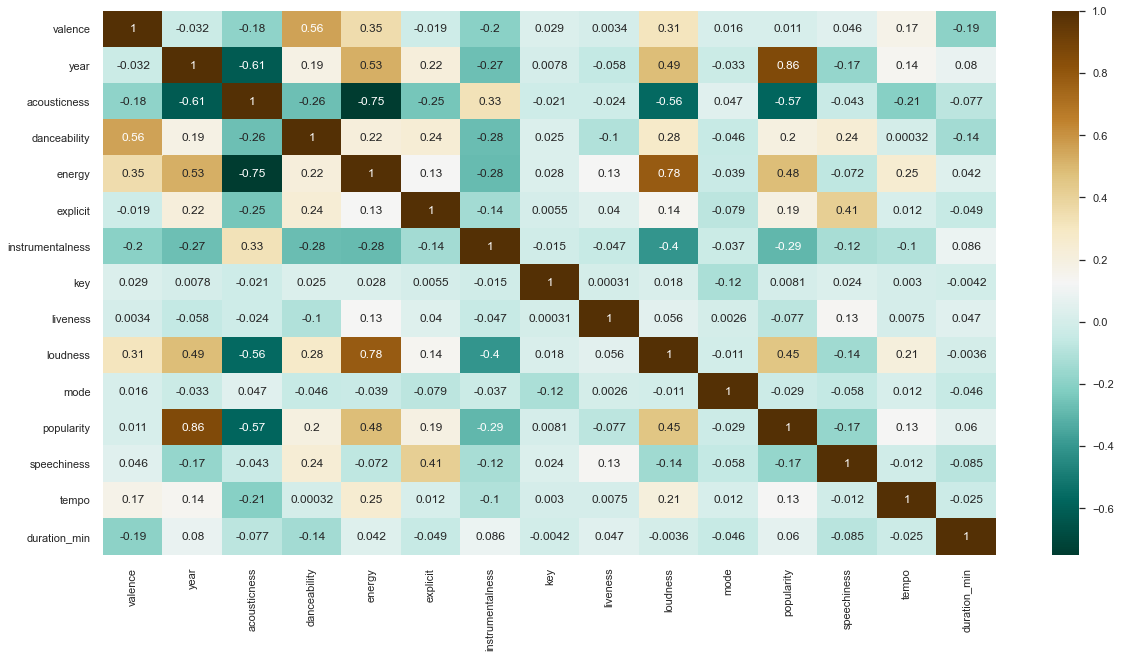

In [26]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

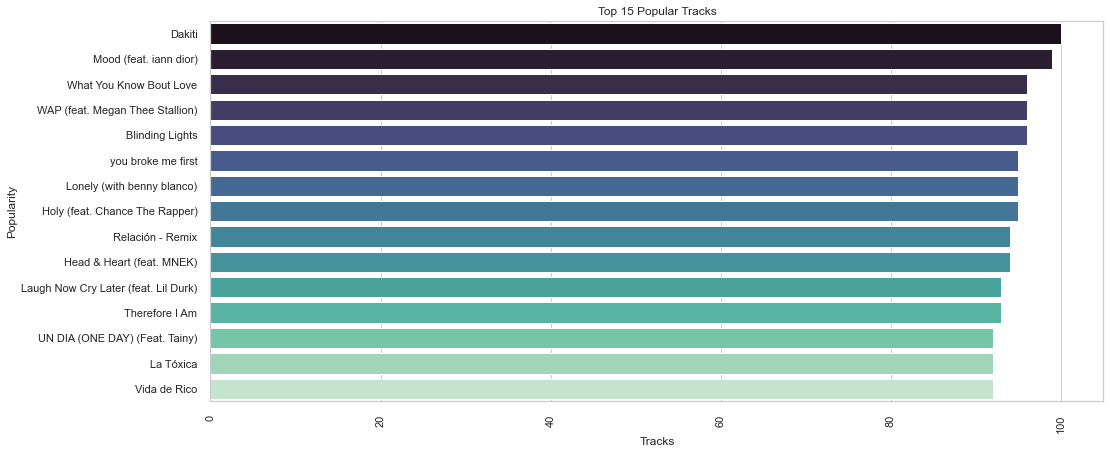

In [27]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [28]:
df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

name
Dakiti                                  100.0
Mood (feat. iann dior)                   99.0
What You Know Bout Love                  96.0
WAP (feat. Megan Thee Stallion)          96.0
Blinding Lights                          96.0
you broke me first                       95.0
Lonely (with benny blanco)               95.0
Holy (feat. Chance The Rapper)           95.0
Relación - Remix                         94.0
Head & Heart (feat. MNEK)                94.0
Laugh Now Cry Later (feat. Lil Durk)     93.0
Therefore I Am                           93.0
UN DIA (ONE DAY) (Feat. Tainy)           92.0
La Tóxica                                92.0
Vida de Rico                             92.0
Name: popularity, dtype: float64

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

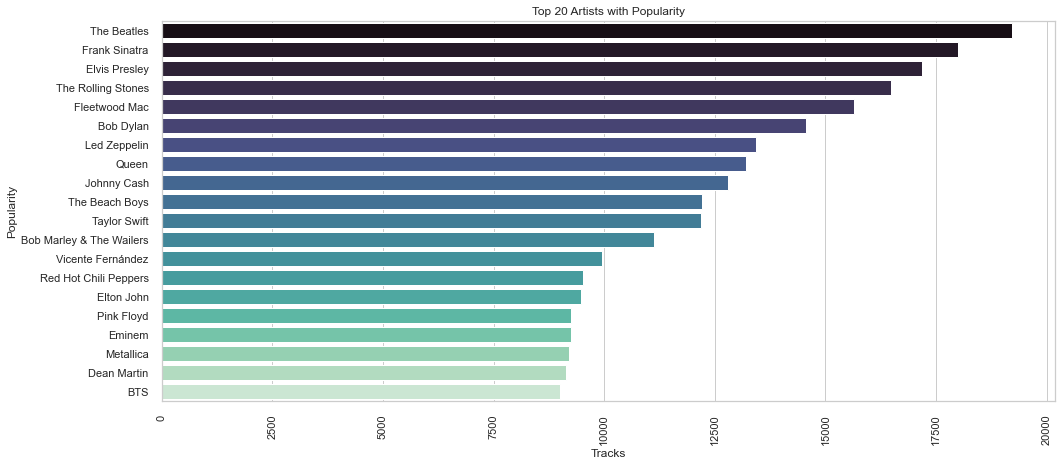

In [29]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

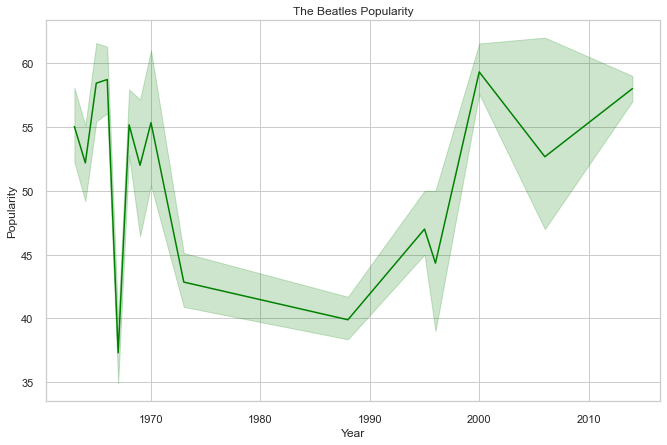

In [30]:
# visualize the popularity of The Beatles songs over the year
Beatles = df[df['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

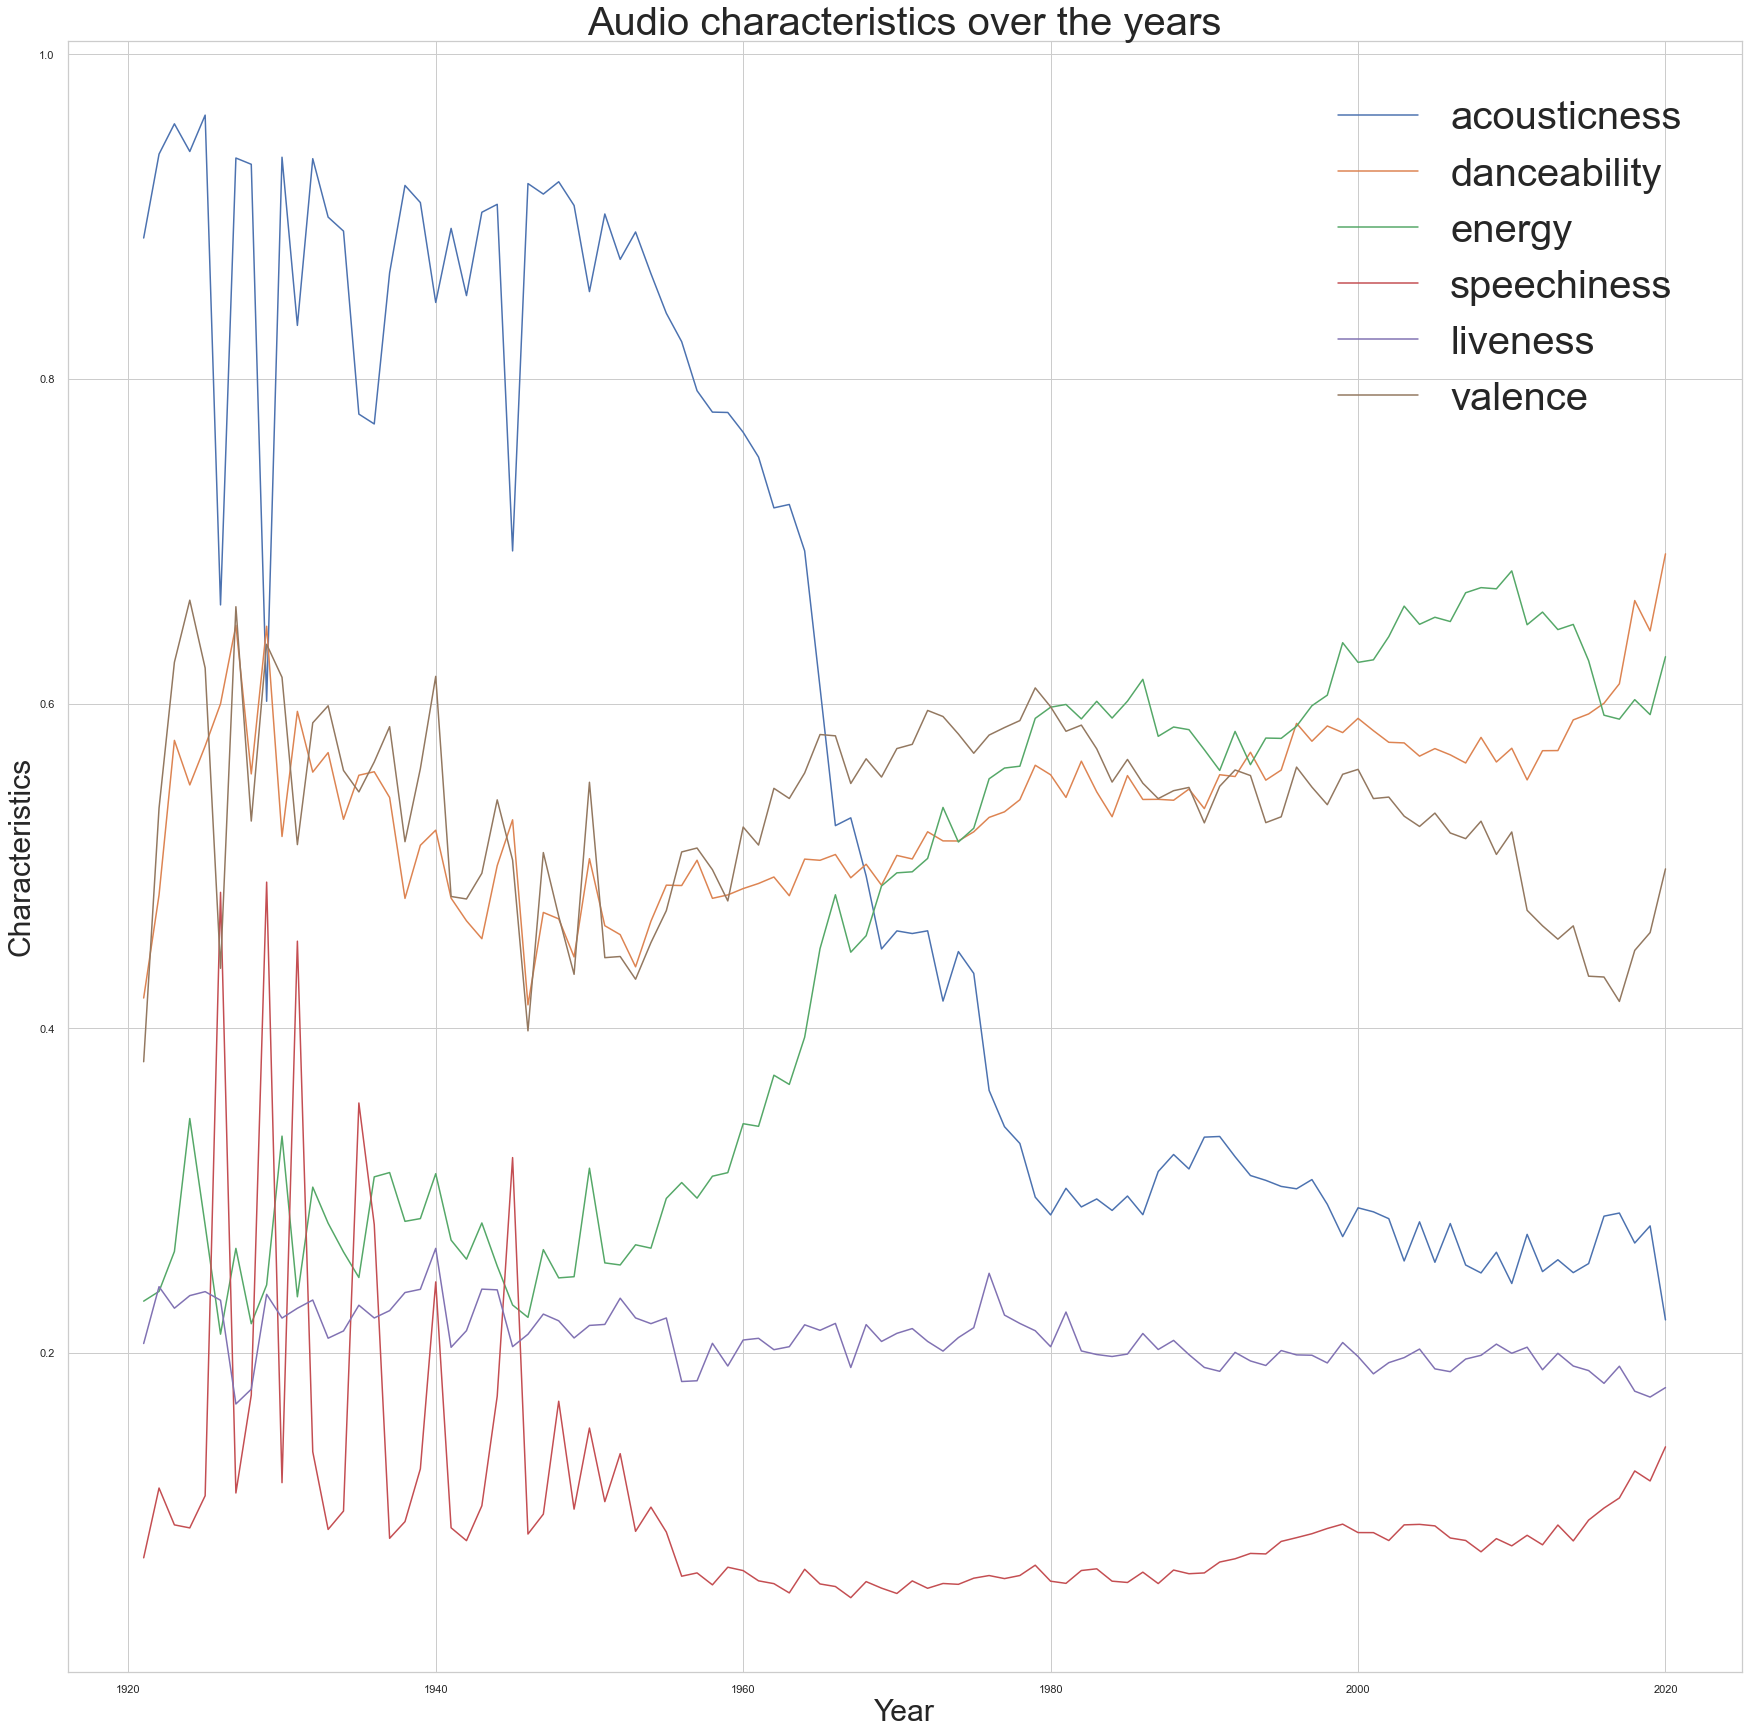

In [31]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

In [33]:
y=pd.DataFrame(df['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Эрнест Хемингуэй,1211
1,Эрих Мария Ремарк,1068
2,Francisco Canaro,942
3,Frank Sinatra,630
4,Ignacio Corsini,628


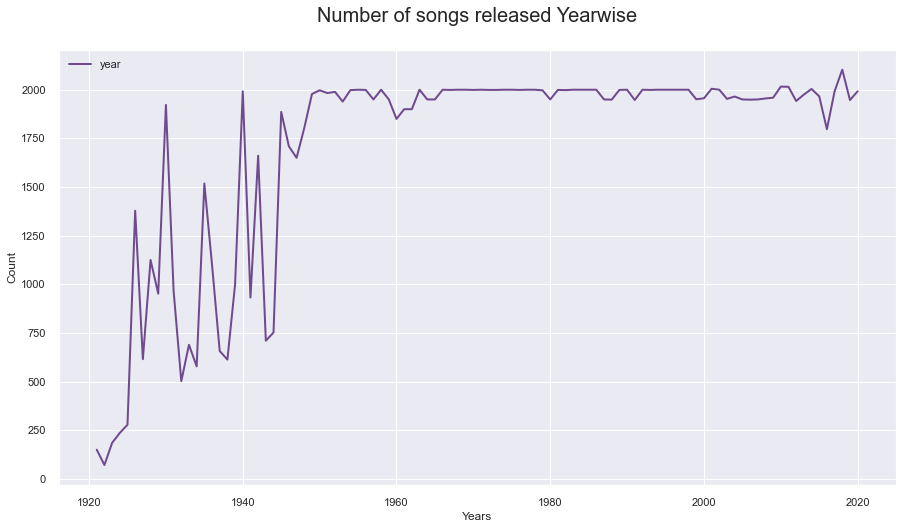

In [34]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

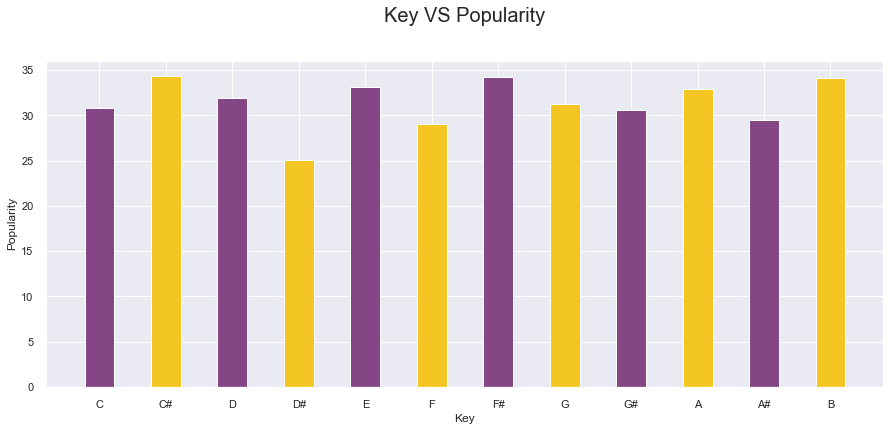

In [35]:
keypop = pd.DataFrame(df.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#844685','#f3c623'])
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

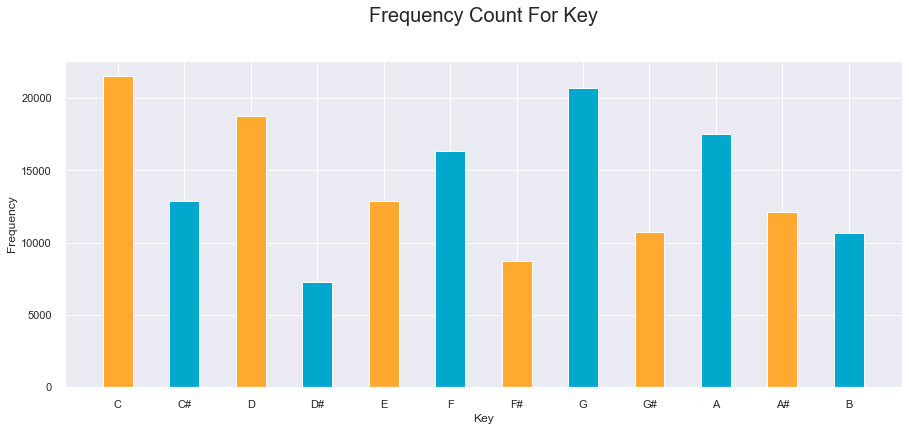

In [36]:
key = pd.DataFrame(df['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

In [38]:
df_by_genres['genres'].nunique()

2973

In [39]:
df_artist.artists

0                         "Cats" 1981 Original London Cast
1                                "Cats" 1983 Broadway Cast
2              "Fiddler On The Roof” Motion Picture Chorus
3           "Fiddler On The Roof” Motion Picture Orchestra
4        "Joseph And The Amazing Technicolor Dreamcoat"...
                               ...                        
28675                                                  麥志誠
28676                                                  黃品源
28677                                                  黃國隆
28678                                                   黑豹
28679                                                  조정현
Name: artists, Length: 28680, dtype: object

# Feature Selection

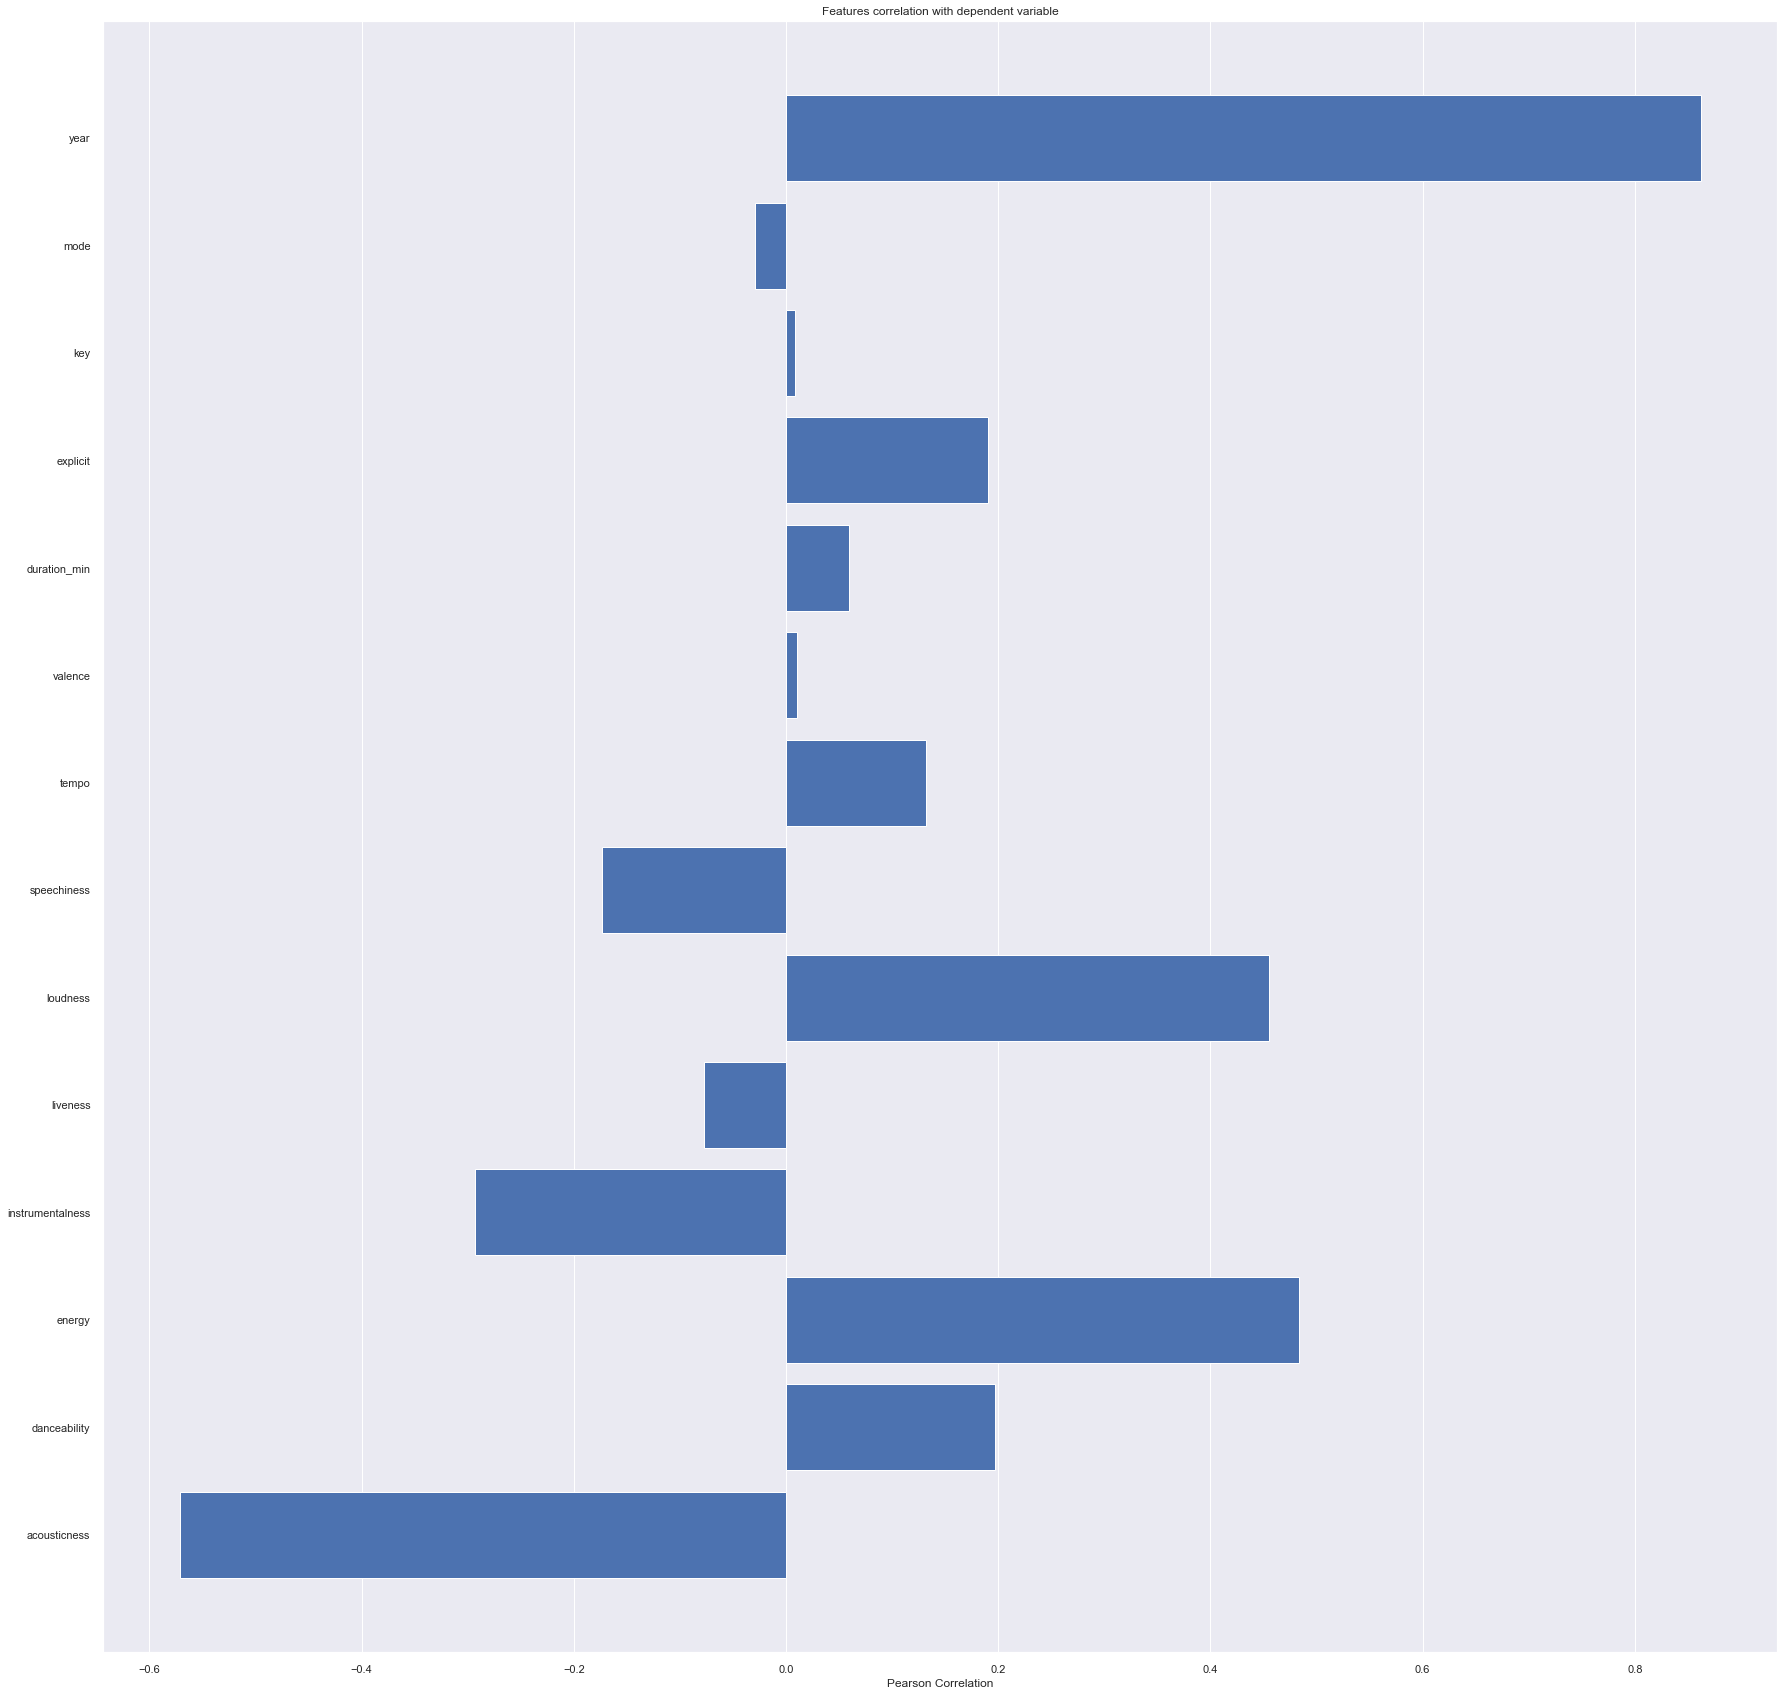

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [41]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

# PRE-PROCESSING

In [42]:
cols = list(pd.read_csv('data/data.csv', nrows =1))
df1 = pd.read_csv('data/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [43]:
X_train.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
74462,0.484,2017,0.2060,['Christian French'],0.550,234192,0.580,0,0.000001,4,0.1190,-7.687,0,0.0784,82.270
146712,0.763,1975,0.5110,['The Marshall Tucker Band'],0.528,150933,0.812,0,0.000284,2,0.1570,-4.983,1,0.0517,110.442
158411,0.931,1959,0.8230,"[""Anita O'Day""]",0.460,125707,0.303,0,0.000000,0,0.0676,-12.567,0,0.1070,170.608
109710,0.329,1942,0.0117,['Orchestra Studio 7'],0.582,224967,0.443,0,0.868000,7,0.0895,-12.506,1,0.0307,94.825
128817,0.585,1960,0.7820,['Quincy Jones'],0.681,138467,0.312,0,0.072800,8,0.1690,-11.488,1,0.0723,121.058


# FEATURES TRANSFORMATIONS

In [44]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X
    


In [45]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)


# One Hot Encoder

In [46]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Min Max Scaler

In [47]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [48]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

# Decision Tree

In [49]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):
    """
    Design ML model and returns r2-score and Mean squared Error for Train and Test Datasets
    
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    :param min_samples_split: 
    :param max_leaf_nodes: 
    OUTPUT:
    train_rmse - Root Mean Squared Error for Train dataset
    test_rmse - Root Mean Squared Error for Train dataset
    r2_train - r2-score for Train Dataset
    r2_test - r2-score for Test Dataset
    y_train_pred and y_test_pred - For Visualizing purpose
    mae - Mean Absolute Error
    """
    
    
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    mae = (abs(y_test - y_test_pred)).mean() 
    
    return train_rmse,test_rmse,r2_train,r2_test,y_train_pred,y_test_pred,mae

train_rmse, test_rmse, r2_train, r2_test,y_train_pred,y_test_pred,mae= Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("Root Mean Squared Error for Train dataset is {}".format(train_rmse))
print("Root Mean Squared Error for Test  dataset is {}".format(test_rmse))
print("r2-score for Train Dataset is {}".format(r2_train))
print("r2-score for Test Dataset is {}".format(r2_test))
print("Mean Absolute Error for Test dataset is {}".format(mae))

Root Mean Squared Error for Train dataset is 0.08769988801533653
Root Mean Squared Error for Test  dataset is 0.10884646442377645
r2-score for Train Dataset is 0.8381548180085765
r2-score for Test Dataset is 0.748962091683729
Mean Absolute Error for Test dataset is 0.07926579723971704


In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((136020, 26), (136020,), (34005, 26), (34005,))

In [51]:
y_train_pred.shape, y_test_pred.shape

((136020,), (34005,))

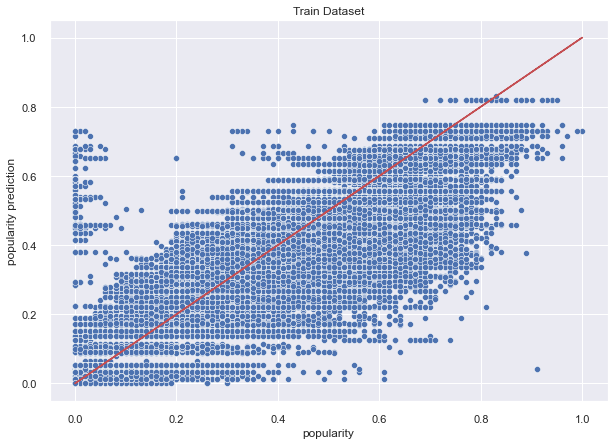

In [52]:
#Plot the results for Train Datasets
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Train Dataset')
plt.show()

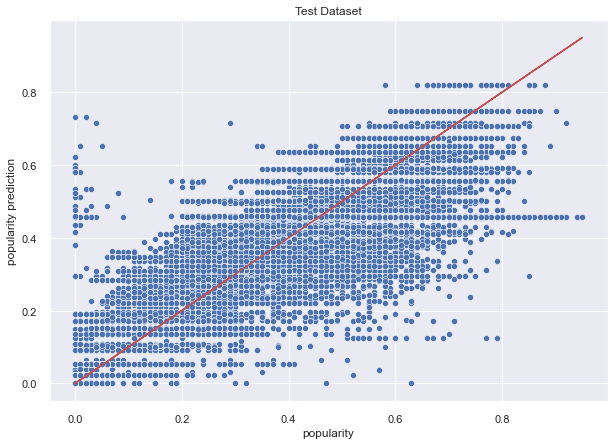

In [53]:
#plot the results for Test dataset
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Test Dataset')
plt.show()

# DECISION TREE with Grid Search CV

In [54]:
n_features = df.shape[1]
n_samples = df.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,5,6,7,8,9,10,11],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

Train R^2 Score : 0.840
Test R^2 Score : 0.766
Best R^2 Score Through Grid Search : 0.829
Best Parameters :  {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [55]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

Mean absolute error of this model: 0.073


In [56]:
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
    tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train).clip(0, 1)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    RMSE3_train.append(train_rmse.round(3))
    y_test_pred = tree.predict(X_test).clip(0, 1)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    RMSE3_test.append(test_rmse.round(3))

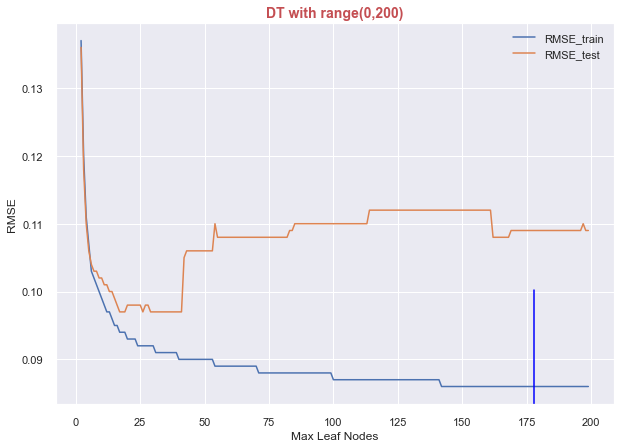

In [57]:
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with range(0,200)', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [58]:
gap3 = [(RMSE3_train[i]/RMSE3_test[i]) for i, num in enumerate(RMSE3_train)]

print(f'Minimum validiation is: {min(gap3):.3%} in index number {gap3.index(min(gap3))}')
print(f'Maximum validiation is: {max(gap3):.3%} in index number {gap3.index(max(gap3))}')

Minimum validiation is: 76.786% in index number 140
Maximum validiation is: 101.695% in index number 1


# RANDOM FOREST

In [59]:
def Randomforest(X_train,y_train,X_test,y_test):
    """
    Design Random Forest Regressor model and returns r2-score and Mean squared Error for Train and Test Datasets
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    OUTPUT:
    Test Accuracy
    Mean Absolute Error
    r2-score for Train and Test datasets
    """
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    
    preds = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    mae = (abs(y_test - preds)).mean() 
    y_train_pred = clf.predict(X_train)
    
    y_test_pred = tree.predict(X_test)

    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    return accuracy,mae,r2_train,r2_test

accuracy,mae,r2_train,r2_test =  Randomforest(X_train,y_train,X_test,y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))
print("Mean Absolute Error: {:.4f} ".format(mae))
print("r2-score of Train Dataset is {} and Test Dataset is {}".format(r2_train*100, r2_test*100))

Test Accuracy: 77.5915
Mean Absolute Error: 0.0756 
r2-score of Train Dataset is 97.59888564425302 and Test Dataset is 74.68737002473064


# CONTENT-BASED RECOMMENDER

In [60]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [61]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

# K means Clustering

In [62]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')